In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Load the dataset
churn_data = pd.read_csv('churn_data.csv')

# Display the first few rows of the dataset
churn_data.head()


,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
churn_data.dtypes

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [35]:
churn_data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

## 1. Data Cleaning and Preparation

In [36]:
churn_data.shape

(7043, 9)

In [37]:
churn_data.isna().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [38]:
# # Data Cleaning: Handle missing values
# churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors='coerce')
# churn_data.dropna(inplace=True)


In [39]:
 churn_data.select_dtypes(include=['object']).columns

Index(['customerID', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

In [40]:
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [42]:


# Encode categorical variables
label_encoders = {}
for column in churn_data.select_dtypes(include=['object']).columns:
    if column != 'customerID':
        label_encoders[column] = LabelEncoder()
        churn_data[column] = label_encoders[column].fit_transform(churn_data[column])


In [43]:
churn_data[column]

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [44]:

# Define the independent and dependent variables
X = churn_data.drop(columns=['customerID', 'Churn'])
y = churn_data['Churn']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,0,1,2,29.85,2505,0
1,5575-GNVDE,34,1,1,0,3,56.95,1466,0
2,3668-QPYBK,2,1,0,1,3,53.85,157,1
3,7795-CFOCW,45,0,1,0,0,42.30,1400,0
4,9237-HQITU,2,1,0,1,2,70.70,925,1


### Purpose of the Code
### The purpose of this code is to encode categorical variables in the churn_data DataFrame into numerical 
### values. This is often necessary because many machine learning algorithms require numerical input and cannot   handle categorical data directly.

In [72]:
churn_data

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,34,1,1,0,3,56.95,1889.50,0
2,3668-QPYBK,2,1,0,1,3,53.85,108.15,1
3,7795-CFOCW,45,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,2,1,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,1,1,1,3,84.80,1990.50,0
7039,2234-XADUH,72,1,1,1,1,103.20,7362.90,0
7040,4801-JZAZL,11,0,0,1,2,29.60,346.45,0
7041,8361-LTMKD,4,1,0,1,3,74.40,306.60,1


In [47]:
# Calculate churn rate
churn_rate = churn_data['Churn'].mean() * 100
print(f'Churn Rate: {churn_rate:.2f}%')


Churn Rate: 26.54%


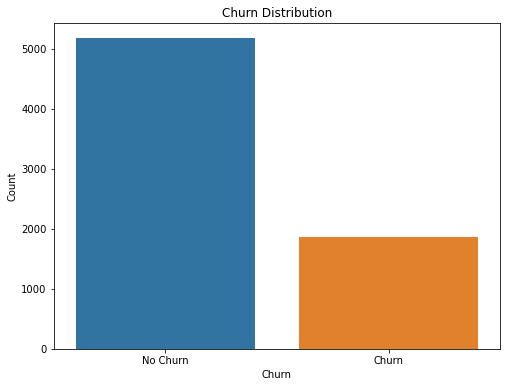

In [50]:
# Plot churn distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=churn_data)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'])
plt.show()


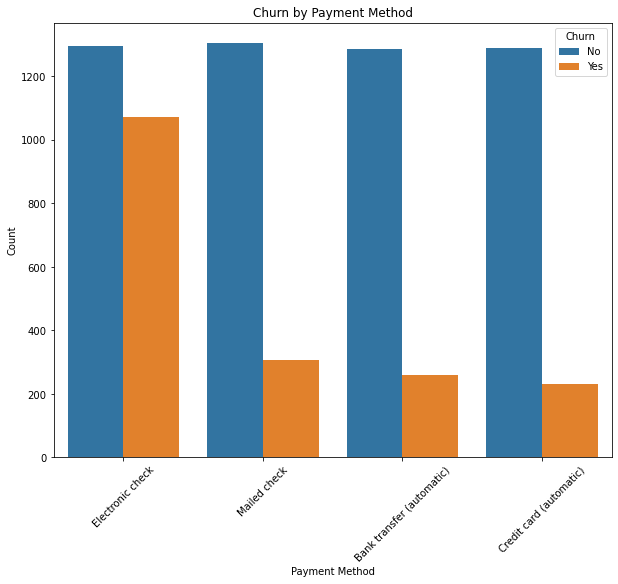

In [65]:
# Payment Method distribution
plt.figure(figsize=(10, 8))
sns.countplot(x='PaymentMethod', hue='Churn', data=pd.read_csv('churn_data.csv'))
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


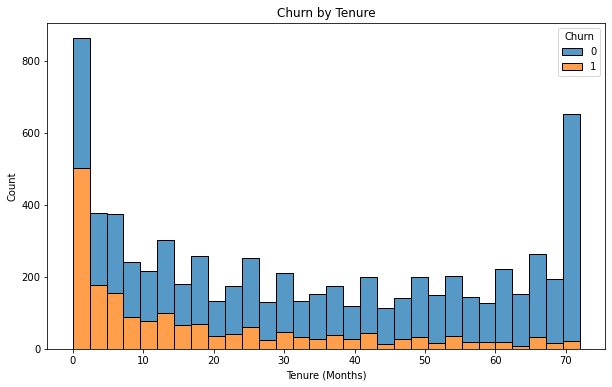

In [53]:
# Plot tenure distribution by churn
plt.figure(figsize=(10, 6))
sns.histplot(data=churn_data, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Churn by Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()


Average Tenure for Churned: 17.98 months
Average Tenure for Non-Churned: 37.57 months


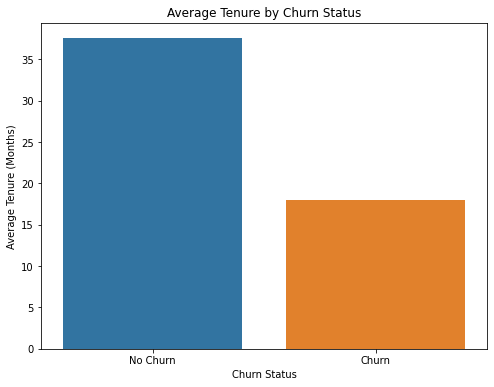

In [54]:
# Average tenure
average_tenure = churn_data.groupby('Churn')['tenure'].mean()
print(f'Average Tenure for Churned: {average_tenure[1]:.2f} months')
print(f'Average Tenure for Non-Churned: {average_tenure[0]:.2f} months')

# Plot average tenure
plt.figure(figsize=(8, 6))
sns.barplot(x=average_tenure.index, y=average_tenure.values)
plt.title('Average Tenure by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Average Tenure (Months)')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'])
plt.show()


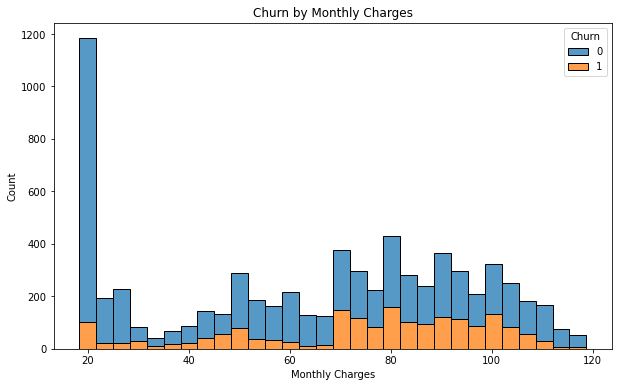

In [55]:
# Plot monthly charges distribution by churn
plt.figure(figsize=(10, 6))
sns.histplot(data=churn_data, x='MonthlyCharges', hue='Churn', multiple='stack', bins=30)
plt.title('Churn by Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()


Average Monthly Charges for Churned: $74.44
Average Monthly Charges for Non-Churned: $61.27


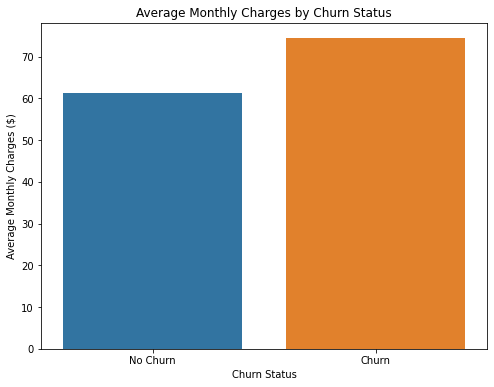

In [56]:
# Average monthly charges
average_monthly_charges = churn_data.groupby('Churn')['MonthlyCharges'].mean()
print(f'Average Monthly Charges for Churned: ${average_monthly_charges[1]:.2f}')
print(f'Average Monthly Charges for Non-Churned: ${average_monthly_charges[0]:.2f}')

# Plot average monthly charges
plt.figure(figsize=(8, 6))
sns.barplot(x=average_monthly_charges.index, y=average_monthly_charges.values)
plt.title('Average Monthly Charges by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Average Monthly Charges ($)')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'])
plt.show()


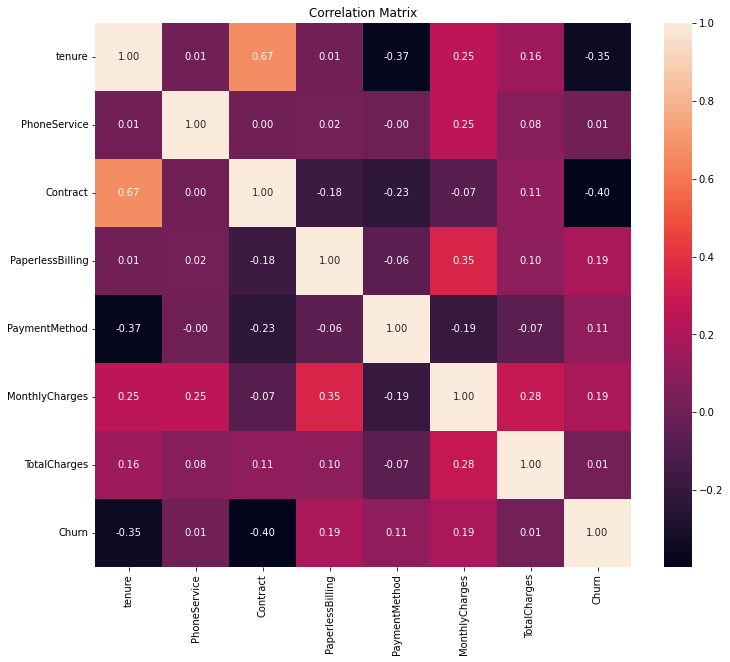

In [58]:
# Compute correlation matrix
corr_matrix = churn_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='rocket', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


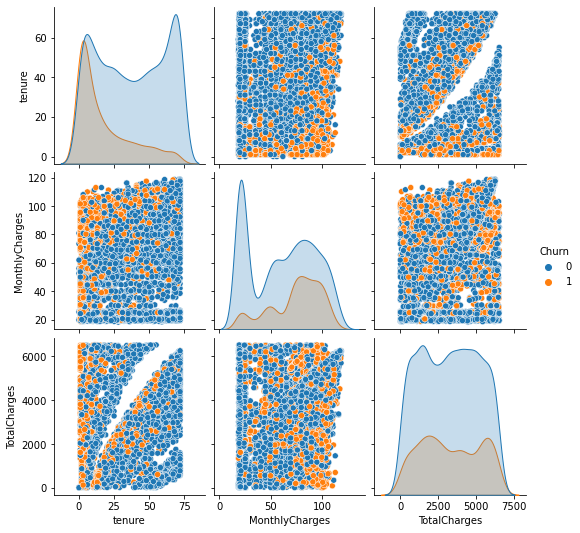

In [59]:
# Pairplot for selected features
features = ['tenure', 'MonthlyCharges', 'TotalCharges']
sns.pairplot(churn_data[features + ['Churn']], hue='Churn')
plt.show()


In [60]:
# Calculate retention rate
retention_rate = (1 - churn_rate / 100) * 100
print(f'Retention Rate: {retention_rate:.2f}%')


Retention Rate: 73.46%


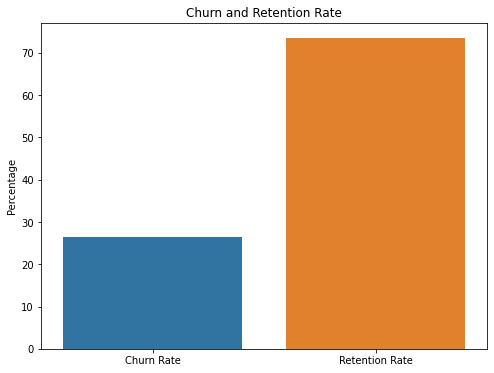

In [61]:
# Plot retention rate
plt.figure(figsize=(8, 6))
sns.barplot(x=['Churn Rate', 'Retention Rate'], y=[churn_rate, retention_rate])
plt.title('Churn and Retention Rate')
plt.ylabel('Percentage')
plt.show()


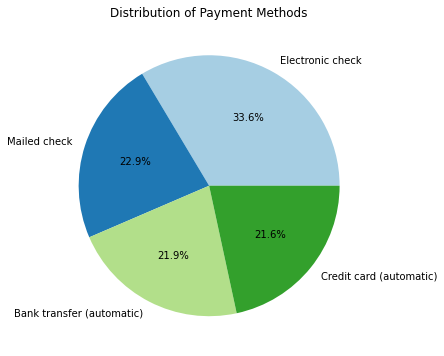

In [62]:
# Load the dataset
churn_data = pd.read_csv('churn_data.csv')

# Group by PaymentMethod and count occurrences
payment_method_counts = churn_data['PaymentMethod'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(payment_method_counts))))
plt.title('Distribution of Payment Methods')
plt.show()


In [19]:
y_train.shape

(5634,)

In [20]:
X_train.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,21,1,1,0,3,64.85,610
1623,54,1,2,1,0,97.20,4319
6074,1,0,0,1,2,23.45,1940
1362,4,1,0,1,2,70.20,2012
6754,0,1,2,1,0,61.90,0


In [21]:
y_train.head()

2142    0
1623    0
6074    1
1362    1
6754    0
Name: Churn, dtype: int32

In [22]:

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## 2. Building your First Model

In [23]:
X_train

array([[-4.65683364e-01,  3.29573443e-01,  3.72908354e-01, ...,
         1.33926673e+00, -4.73723375e-04, -1.40800618e+00],
       [ 8.85536787e-01,  3.29573443e-01,  1.57759050e+00, ...,
        -1.47094882e+00,  1.07475386e+00,  5.58360318e-01],
       [-1.28460467e+00, -3.03422506e+00, -8.31773795e-01, ...,
         4.02528212e-01, -1.37649913e+00, -7.02892284e-01],
       ...,
       [-8.34197950e-01,  3.29573443e-01, -8.31773795e-01, ...,
         4.02528212e-01, -1.45294499e+00, -3.21706651e-01],
       [-8.34197950e-01,  3.29573443e-01, -8.31773795e-01, ...,
         4.02528212e-01,  1.14953785e+00, -1.53524478e+00],
       [-2.60953038e-01,  3.29573443e-01,  3.72908354e-01, ...,
        -5.34210304e-01, -1.49781538e+00,  3.30921324e-01]])

In [24]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


## 3. Feature Elimination using RFE

In [25]:
from sklearn.feature_selection import RFE

# Initialize the model for RFE
rfe_model = LogisticRegression()

# Initialize RFE with the model
rfe = RFE(estimator=rfe_model, n_features_to_select=5)

# Fit RFE
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = rfe.support_

# Transform the datasets
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Retrain the model on the selected features
model.fit(X_train_rfe, y_train)

# Make predictions
y_pred_rfe = model.predict(X_test_rfe)


### RFE stands for Recursive Feature Elimination. It is a feature selection technique that recursively removes the least important features and builds a model using the remaining attributes.


### An RFE object is created with rfe_model as the estimator and n_features_to_select=5. This means RFE will select the top 5 most important features from the dataset.

### Various Model evaluation techniques

## 4. Confusion Matrix and Accuracy

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rfe)
print("Confusion Matrix:\n", conf_matrix)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rfe)
print("Accuracy: ", accuracy)


Confusion Matrix:
 [[937  99]
 [170 203]]
Accuracy:  0.8090844570617459


## 5. Metrics Beyond Accuracy: Sensitivity & Specificity

In [27]:
# Calculate sensitivity (recall) and specificity
from sklearn.metrics import recall_score

# Sensitivity (Recall)
sensitivity = recall_score(y_test, y_pred_rfe)
print("Sensitivity: ", sensitivity)

# Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rfe).ravel()
specificity = tn / (tn + fp)
print("Specificity: ", specificity)


Sensitivity:  0.5442359249329759
Specificity:  0.9044401544401545


## 6. ROC Curve

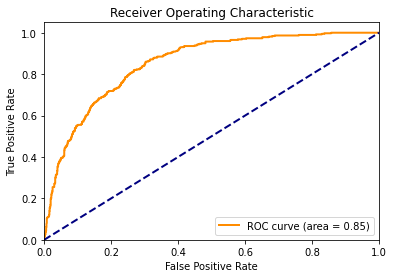

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_rfe)[:, 1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, model.predict_proba(X_test_rfe)[:, 1]))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


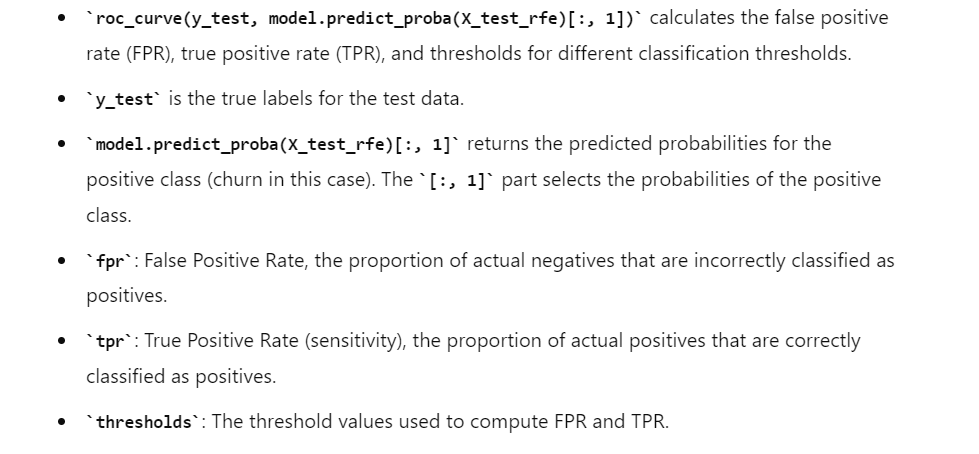

In [29]:
# # Find the optimal threshold
# optimal_idx = np.argmax(tpr - fpr)
# optimal_threshold = thresholds[optimal_idx]
# print("Optimal Threshold: ", optimal_threshold)


## 7. Model Evaluation Metrics - Exercise

In [30]:
# Calculate precision and recall
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred_rfe)
recall = recall_score(y_test, y_pred_rfe)

print("Precision: ", precision)
print("Recall: ", recall)


Precision:  0.6721854304635762
Recall:  0.5442359249329759


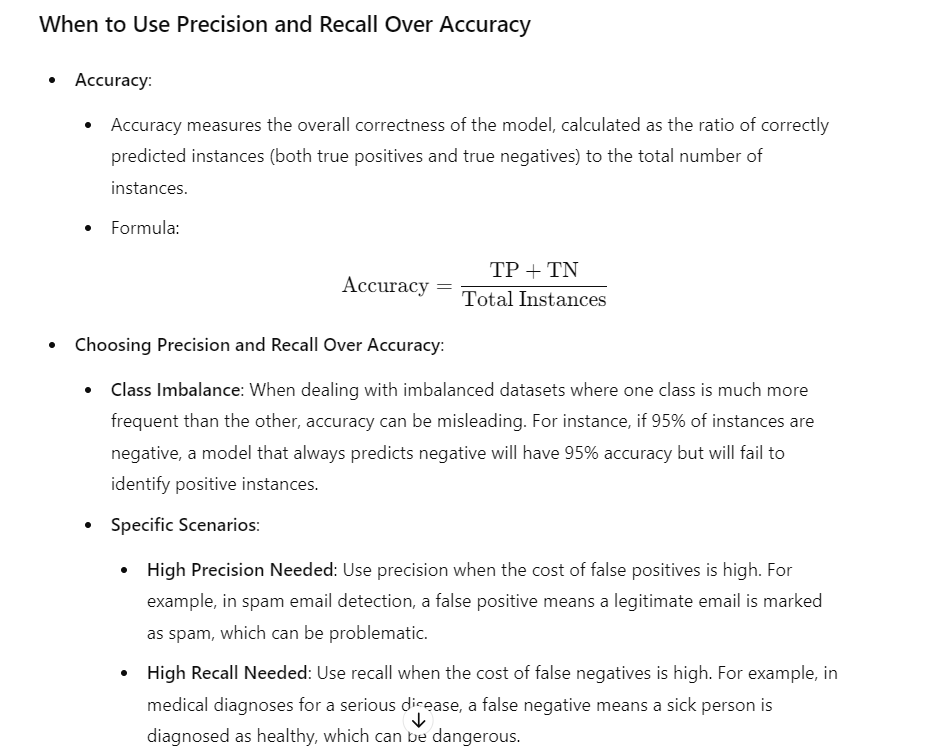

In [71]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Load the dataset
churn_data = pd.read_csv('churn_data.csv')

# Data Cleaning and Preparation
# Convert 'TotalCharges' to numeric and handle missing values
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors='coerce')
churn_data.dropna(inplace=True)

# Encode categorical variables
label_encoders = {}
for column in churn_data.select_dtypes(include=['object']).columns:
    if column != 'customerID':
        label_encoders[column] = LabelEncoder()
        churn_data[column] = label_encoders[column].fit_transform(churn_data[column])

# Define features and target
X = churn_data.drop(columns=['customerID', 'Churn'])
y = churn_data['Churn']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

# Evaluate the model
y_pred = best_model.predict(X_test_scaled)
y_proba = best_model.predict_proba(X_test_scaled)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

print(f'ROC AUC Score: {roc_auc_score(y_test, y_proba)}')

# Save the model and scaler
joblib.dump(best_model, 'best_logistic_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

ROC AUC Score: 0.8265914655926614


['scaler.pkl']